<a href="https://colab.research.google.com/github/Rumsha001/ML-Project/blob/main/RealEstate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **House Price Prediction**
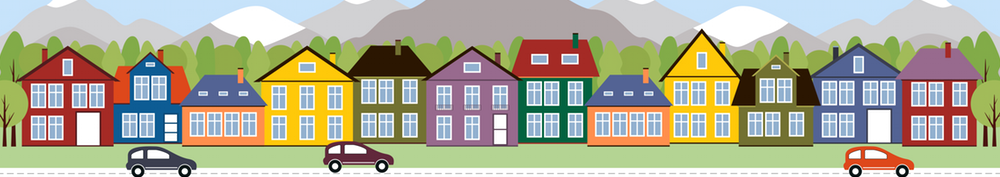



**Group Members:**

1.   Ramsha Arif (23395)
2.   Sarosh Aamir (23390)


# **Setting up Libraries**

In [ ]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# data cleaning pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Import necessary Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold



# **Data Preparation**

In [ ]:
# loading data set

git_url_train='https://raw.githubusercontent.com/Rumsha001/ML-Project/main/train.csv'
git_url_test='https://raw.githubusercontent.com/Rumsha001/ML-Project/main/train.csv'

df_train = pd.read_csv(git_url_train)
df_test = pd.read_csv(git_url_test)

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Data Exploration**

## **Identifying the number of features or columns**

In [22]:
#checking the number of features in the Datasets
print("\n\nNumber of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,'\n', len(df_train.columns))




Number of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 19


## **Identifying the data types of features**

In [ ]:
#checking the data types of features
print("\n\nDatatypes of features in the datasets :\n",'#' * 40)
print("\nTraining Set : \n",'-' * 20,"\n", df_train.dtypes )




Datatypes of features in the datasets :
 ########################################

Training Set : 
 -------------------- 
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


## **Check summary of 'Sale price' feature**

In [ ]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## **Plotting Histogram of 'Sale Price'**

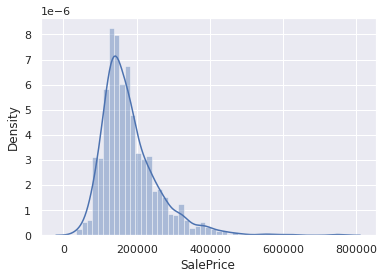

In [ ]:
#histogram
sns.distplot(df_train['SalePrice']);

## **Exploring Relationship with Numerical Values**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


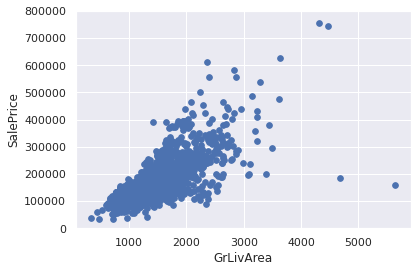

In [ ]:
#scatter plot grlivarea/saleprice
# GrLivArea: Above grade (ground) living area square feet
#relationship with numerical

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


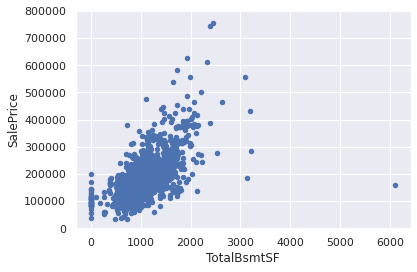

In [ ]:
#scatter plot totalbsmtsf/saleprice
#TotalBsmtSF: Total square feet of basement area

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## **Exploring Relationship with Categorical features**

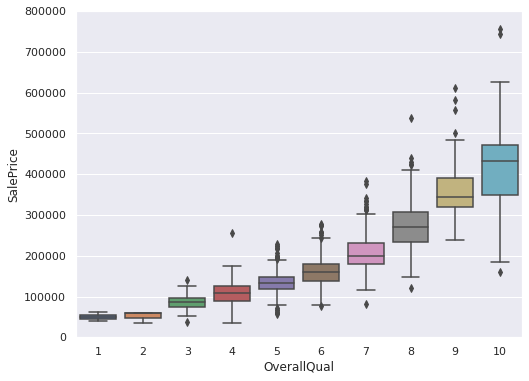

In [ ]:
#box plot overallqual/saleprice
#OverallQual: Rates the overall material and finish of the house on the scale 1 to 10
# 1 rates 'poor' while 10 rates 'very excellent'
#Relationship with categorical features

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

## **Plotting Sale Price w.r.t Year Built**

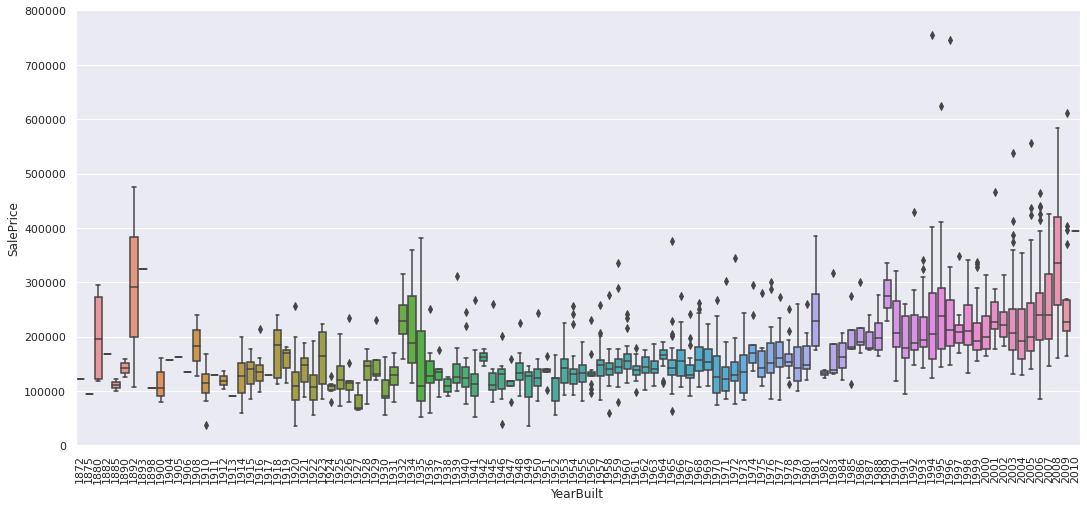

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

## **Plotting Correlation between each variable and SalePrice**

To explore the dataset in depth, we will try to visualize the data in a more meaningful manner:

1.   Correation matrix (heatmap style)
2.   'SalePrice' correlation matrix (zoomed heatmap style).
3.   Scatter plots between the most correlated variables (move like Jagger style).



## **Correlation matrix (heatmap style)**

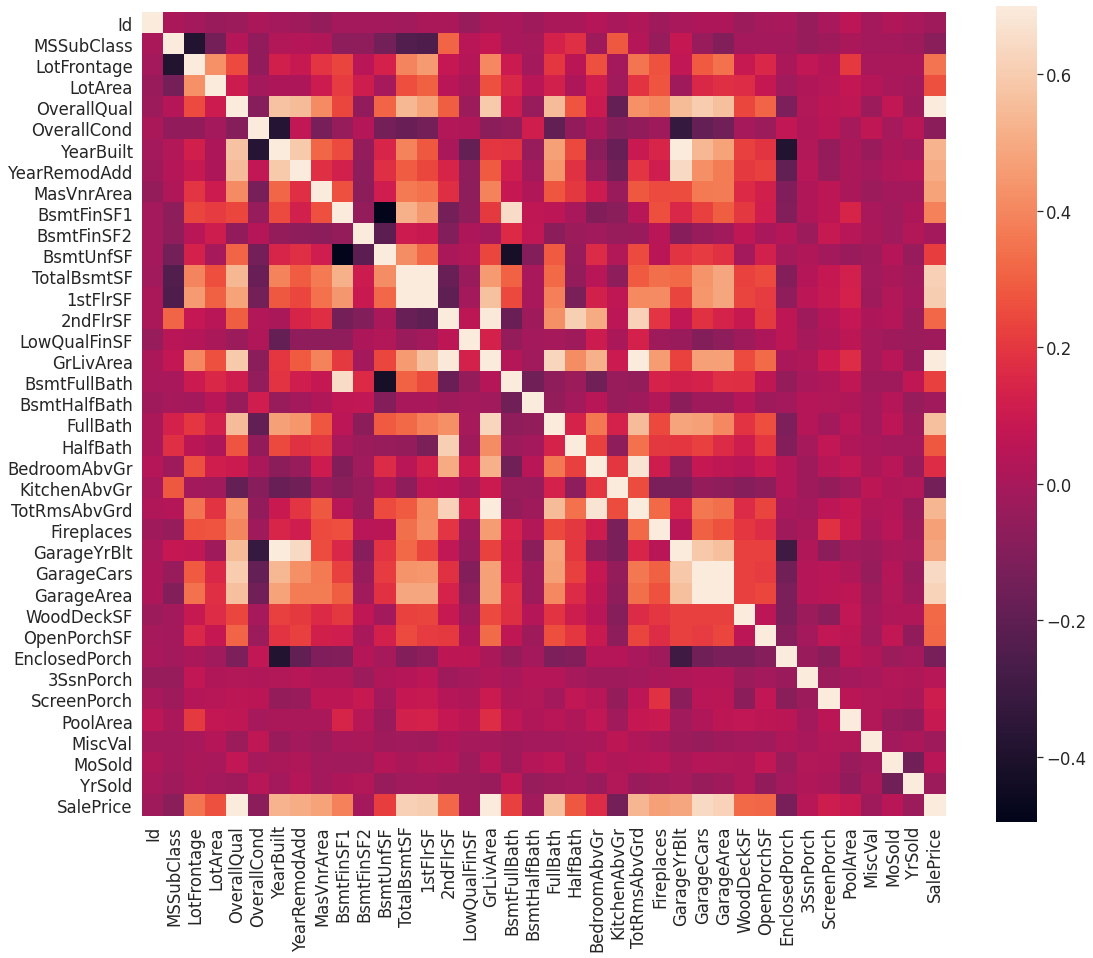

In [ ]:
# Create a heatmap to display correlations between each variable
# Graphical representation of data where the individual values contained in a matrix are represented as colors.

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat, vmax=.7, square=True);

Zoom

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt']


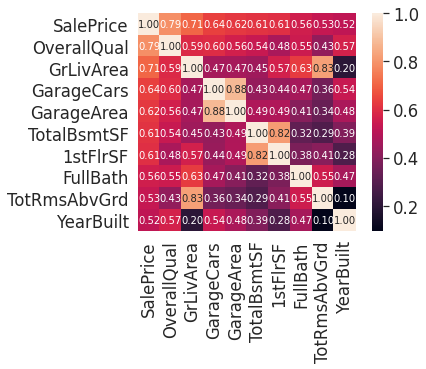

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
imp_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(imp_cols.values)
cm = np.corrcoef(df_train[imp_cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=imp_cols.values, xticklabels=imp_cols.values)
plt.show()

## **Scatter plots between 'SalePrice' and correlated variables**

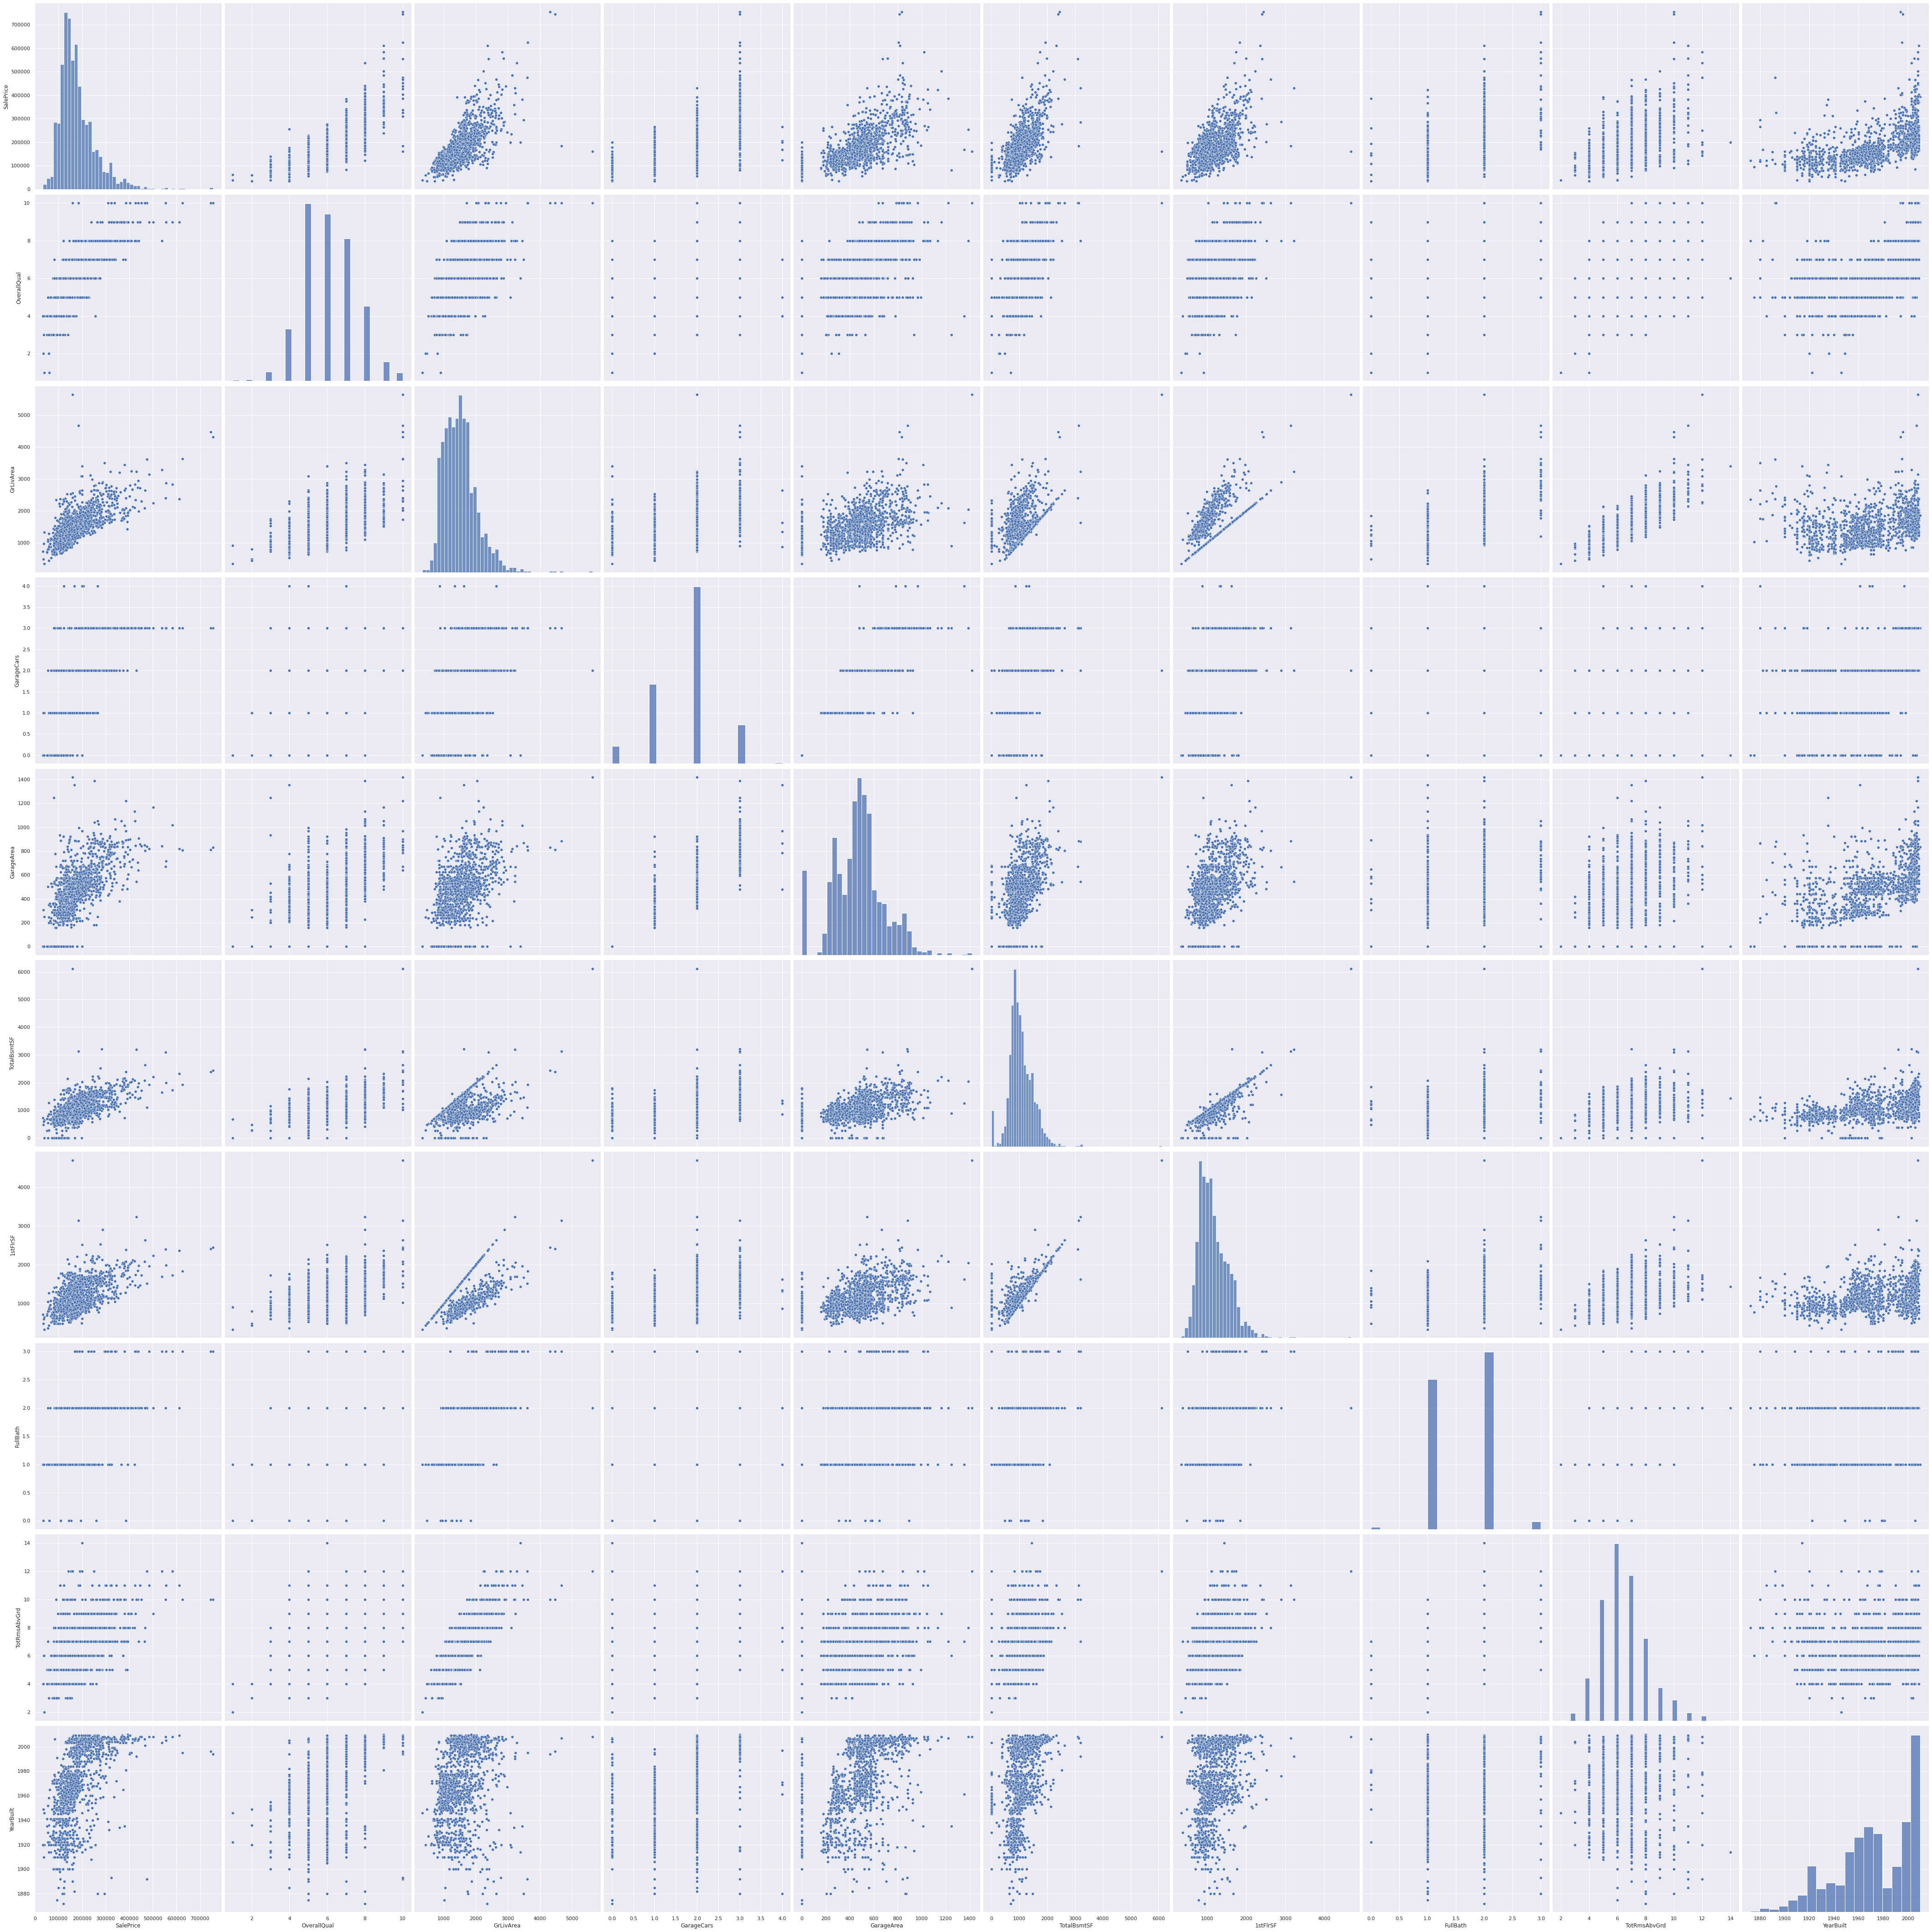

In [ ]:
#scatterplot
sns.set()
cols = imp_cols.values
sns.pairplot(df_train[cols], size = 6)
plt.show();

## **Histograms**

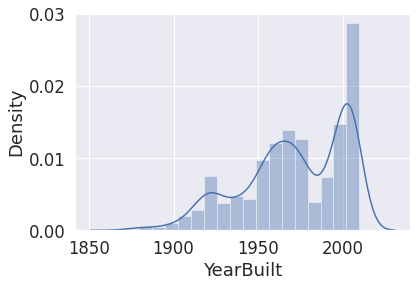

In [ ]:
#As per the requirement, lets plot some histograms

#YearBuilt
sns.distplot(df_train['YearBuilt'])


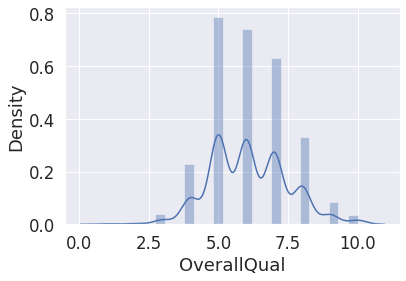

In [ ]:
#Checking histogram of Over all Quality
sns.distplot(df_train['OverallQual'])

## **Correlations between some significant categorical features and 'SalePrice'**

Box plots are excellent tools to visualize categorical distributions

(-0.5, 9.5, 0.0, 800000.0)

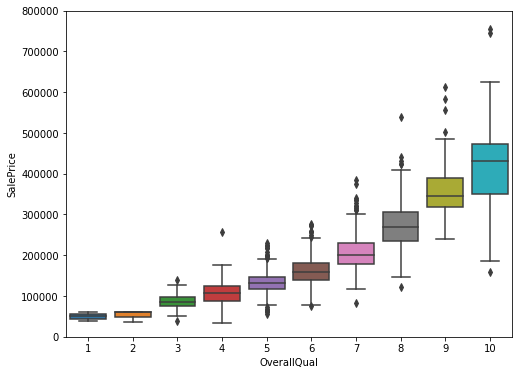

In [ ]:
# visualize correlations between OverallQual and SalePrice
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 3.5, 0.0, 800000.0)

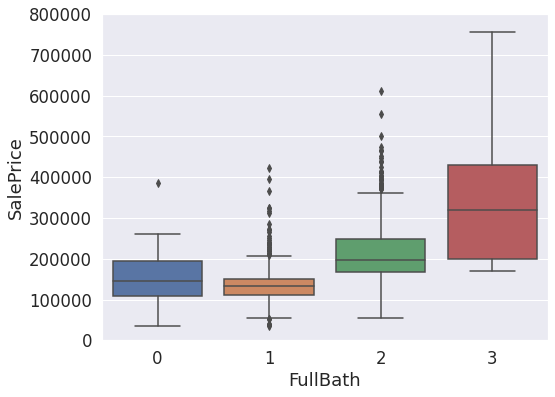

In [ ]:
# visualize correlations between FullBath and SalePrice

data = pd.concat([df_train['SalePrice'], df_train['FullBath']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='FullBath', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 4.5, 0.0, 800000.0)

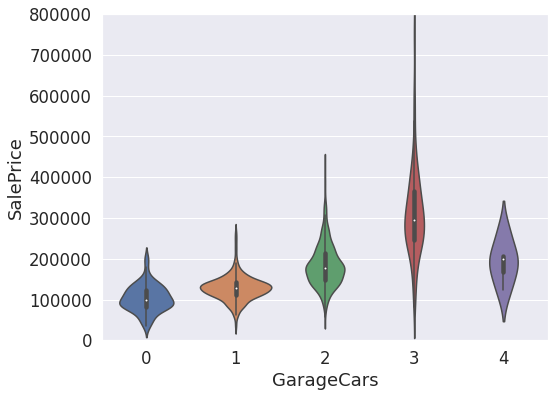

In [ ]:
# visualize correlations between GarageCars and SalePrice

data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.violinplot(x='GarageCars', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)


# **Data Cleaning**

Now that we deeply understand the underlying statistics of the dataset from our exploratory data analysis, lets begin cleaning the data for the future machine learning modeling.

In [ ]:
# Lets Check MISSING DATA
# create a table that displays count and percentage of data missing
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


## **Plotting Features with Empty cells on Bar Chart**

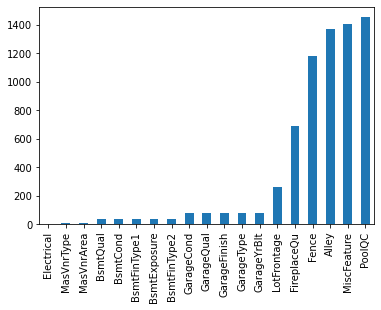

In [ ]:
#plot no. of empty cells
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## **Erasing Columns with Missing Values**

Following are some important observations that lead us to erase columns that has less importance in terms of their existance and eventually it will help us to draw more accurate conclusions:

> None of these variables seem to be very important and are not aspects in which we think about when buying a house, so we are definitely going to erase them i.e.  'PoolQC', 'MiscFeature', 'Alley', 'FireplaceQu', 'GarageX', 'BsmtX',  'MasVnrArea', 'MasVnrType' etc.

> In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.



In [ ]:
# dealing with missing data

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

# Let's check no. of columns...
print(len(df_train.columns))

63


## ***ONE HOT ENCODING***

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#Getting Most Imp Features
df_train = df_train[imp_cols.values]
df_test = df_test[imp_cols.values]

#One Hot Encoding For OverAllQual Categorical Feature On Test And Train Data
enc = OneHotEncoder(handle_unknown='ignore')
enc_df_train = pd.DataFrame(enc.fit_transform(df_train[['OverallQual']]).toarray())
enc_df_train.columns = [ f'Qual {i+1}' for i in range(10)]

enc_df_test = pd.DataFrame(enc.fit_transform(df_test[['OverallQual']]).toarray())
enc_df_test.columns = [ f'Qual {i+1}' for i in range(10)]

# merge with main df on key values
df_train = df_train.join(enc_df_train)
df_train = df_train.drop(['OverallQual'], axis=1)

df_test = df_test.join(enc_df_test)
df_test = df_test.drop(['OverallQual'], axis=1)

#Column 'OverallQual' is splitted into Qual1,...,Qual10 featuresw 
df_train.describe()




,SalePrice,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,Qual 1,Qual 2,Qual 3,Qual 4,Qual 5,Qual 6,Qual 7,Qual 8,Qual 9,Qual 10
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,180930.394791,1515.546950,1.766964,473.030158,1057.891021,1162.906785,1.564770,6.517478,1971.244003,0.001372,0.002058,0.013032,0.079561,0.271605,0.256516,0.218793,0.115226,0.029492,0.012346
std,79468.964025,525.650927,0.747546,213.869604,438.500975,386.572089,0.550987,1.625902,30.199555,0.037024,0.045330,0.113448,0.270705,0.444940,0.436860,0.413570,0.319404,0.169240,0.110461
min,34900.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129950.000000,1129.000000,1.000000,333.000000,796.000000,882.000000,1.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,163000.000000,1464.000000,2.000000,480.000000,992.000000,1088.000000,2.000000,6.000000,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214000.000000,1777.500000,2.000000,576.000000,1298.500000,1391.500000,2.000000,7.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,755000.000000,5642.000000,4.000000,1418.000000,6110.000000,4692.000000,3.000000,14.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### **K-Fold Cross Validation / Model Selection**

In [ ]:
df_train.fillna(1,inplace=True)
df_train_x = df_train.drop('SalePrice',axis=1)
df_train_y = df_train['SalePrice']

df_test_x = df_test.drop('SalePrice',axis=1)
df_test_y = df_test['SalePrice']



#Kfold Validation
kfold = model_selection.KFold(n_splits=5, random_state=150)
model_kfold = LinearRegression()
results_kfold = model_selection.cross_val_score(model_kfold, df_train_x, df_train_y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))


#Fit The Line
model_kfold.fit(df_train_x,df_train_y)




Accuracy: 77.22%


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **Prediction**

In [40]:
#Interpreting the coefficients
coeff_df = pd.DataFrame(model_kfold.coef_, df_test_x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GrLivArea,59.263690
GarageCars,14696.965317
GarageArea,1.573590
TotalBsmtSF,21.704139
1stFlrSF,2.419636
FullBath,-1054.081311
TotRmsAbvGrd,-1498.543562
YearBuilt,462.801296
Qual 1,-38778.952772
Qual 2,-43746.013557


In [38]:



# regression results 
print(f'Coefficients:\n {model_kfold.coef_}\n')
#coeff_df = pd.DataFrame(model_kfold.coef_, df_test_x.columns, columns=['Coefficient'])


# variance score: 100 means perfect prediction 
print('Score b/w Actual vs Predicted On Test Data: {}\n'.format(model_kfold.score(df_test_x, df_test_y)))
# Y intercept
print(f'Linear Regression - Intercept: {model_kfold.intercept_} \n') 


#predict value of Y's with respect of values of X's
y_predicted = model_kfold.predict(df_test_x)

#predicted Vs Actual
df = pd.DataFrame([y_predicted.reshape(1,-1)[0],df_test_y.values.reshape(1,-1)[0]]).T
df.columns = ['Predicted','Actual'] 
df['residual'] = df['Predicted'] - df['Actual']
print(df.head(5))





Coefficients:
 [ 5.92636899e+01  1.46969653e+04  1.57358959e+00  2.17041391e+01
  2.41963634e+00 -1.05408131e+03 -1.49854356e+03  4.62801296e+02
 -3.87789528e+04 -4.37460136e+04 -4.29393494e+04 -3.84683463e+04
 -3.02571061e+04 -2.69134303e+04 -1.30051109e+04  2.02176163e+04
  8.88372074e+04  1.00028374e+05]

Score b/w Actual vs Predicted On Test Data: 0.801750329177453

Linear Regression - Intercept: -846700.0245384753 

       Predicted    Actual      residual
0  205436.468206  208500.0  -3063.531794
1  165135.244832  181500.0 -16364.755168
2  213650.330171  223500.0  -9849.669829
3  180605.955516  140000.0  40605.955516
4  286814.858820  250000.0  36814.858820


MAE: 21633.30041800323
MSE: 1250318760.992895
RMSE: 35359.84673316465
R2 Square: 0.801750329177453


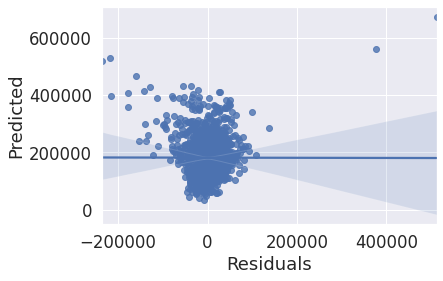

In [32]:
# Evaluating the model

from sklearn import metrics

#Mean Absolute Error
mae = metrics.mean_absolute_error(df_test_y, y_predicted)
print('MAE:', mae)

#Mean Squared Error
mse = metrics.mean_squared_error(df_test_y, y_predicted)
print('MSE:', mse)

#root_mean_error = sqrt(mean_squared_error(df_test_y,y_predicted))
#print(f"Cost => Mean Squared Error: {root_mean_error}")

#Root Mean Squared Error
rmse = np.sqrt(metrics.mean_squared_error(df_test_y, y_predicted))
print('RMSE:', rmse)

#Regression Score Function
r2_square = metrics.r2_score(df_test_y, y_predicted)
print('R2 Square:', r2_square)


#plot  
plt.xlabel('Residuals') #to be changed
plt.ylabel('Predicted') #to be changed
ax = sns.regplot(x=df['residual'].values, y=df['Predicted'].values)
